In [2]:
import pandas as pd 

In [61]:
inputfile = 'data/3_clean_zomato_feat_ori.csv'
outputfile = 'data/3_clean_zomato_feat_ori_sampling.csv'

In [62]:
df = pd.read_csv(inputfile)
df = df[df['rating']>0]

In [63]:
df.head()

,index,url,rest_price_idr,review,lat,long,is_chain,rating,alcohol,delivery,...,melayu,mid_east,noodle,others_type,seafood,snacks,special_food,street_food,tea,western
0,0,https://www.zomato.com/jakarta/wakacao-1-kelap...,150000,56.0,-6.167531,106.901752,1,3.8,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,https://www.zomato.com/jakarta/the-coffee-bean...,110000,61.0,-6.157341,106.907888,1,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,2,https://www.zomato.com/jakarta/angke-kelapa-ga...,450000,363.0,-6.152638,106.892576,0,4.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,https://www.zomato.com/jakarta/ikan-nila-pak-u...,100000,113.0,-6.163588,106.903689,0,3.9,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,https://www.zomato.com/jakarta/hong-kong-sheng...,220000,257.0,-6.157255,106.908430,1,4.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:ylabel='Frequency'>

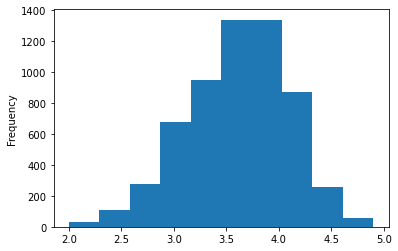

In [64]:
df['rating'].plot(kind='hist')

In [65]:
df_lower_1 = df[df['rating']<2.7]
df_lower_2 = df[(df['rating'] >= 2.7) & (df['rating'] < 3.3) ]
df_midd = df[ (df['rating'] >= 3.3) & (df['rating'] < 4.0) ] 
df_upp1 = df[ (df['rating'] >= 4.0) & (df['rating'] < 4.5) ] 
df_upp2 = df[ df['rating'] >= 4.5] 

In [66]:
df_lower_1.shape , df_lower_2.shape,  df_midd.shape, df_upp1.shape, df_upp2.shape 

((199, 47), (1185, 47), (2921, 47), (1420, 47), (188, 47))

In [67]:
def sampling (df_input, sampling_row, iteration):
    result = []
    for i in range(iteration):
          result.append(df_input.sample(sampling_row))
    df_result = pd.concat(result)
    return df_result 

In [68]:
# lower 1 
df_lower1 = sampling(df_lower_1, 2, 900)

In [69]:
# lower 2
df_lower2 = sampling(df_lower_2, 2, 800)

In [70]:
# upper 1 
df_upper1 = sampling(df_upp1, 2, 700)

In [71]:
# upper 2 
df_upper2 = sampling(df_upp2, 2, 700)

In [72]:
df_result = pd.concat([df_lower1,df_lower2,df_midd,df_upper1,df_upper2])

In [73]:
df_result.shape

(9121, 47)

<AxesSubplot:ylabel='Frequency'>

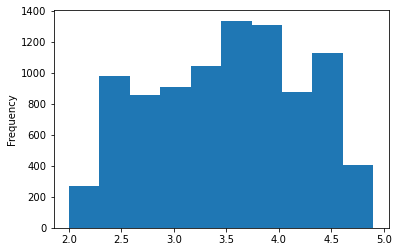

In [74]:
df_result['rating'].plot(kind='hist')

In [75]:
df_result.to_csv(outputfile)